In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("exchange_rate.csv", parse_dates=['date']) # Parsing the date column
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


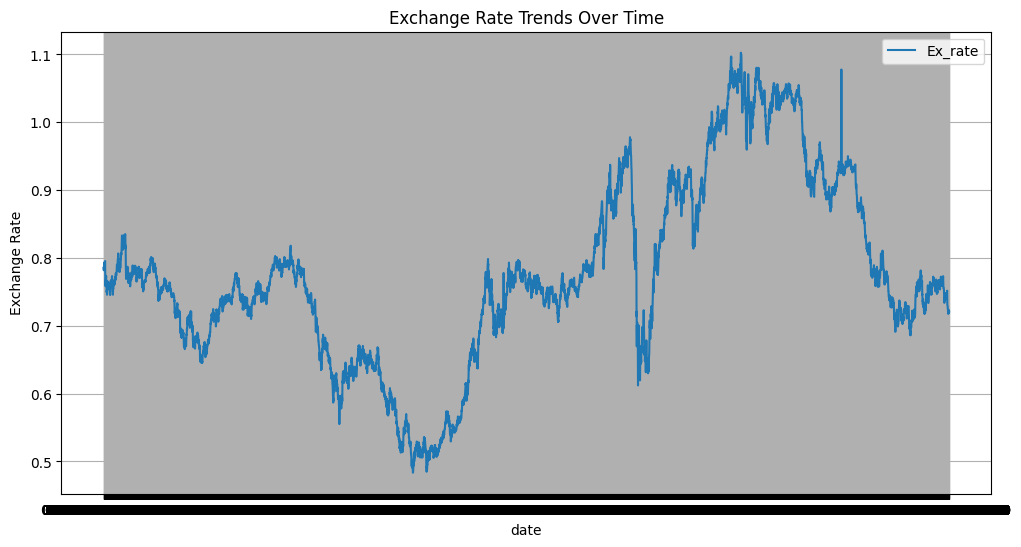

In [3]:
# Initial Exploration
plt.figure(figsize=(12, 6))
for column in df.columns[1:]:  # Iterate over each currency column
    plt.plot(df['date'], df[column], label=column)
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
df.fillna(method='ffill', inplace=True)

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<Figure size 1200x600 with 0 Axes>

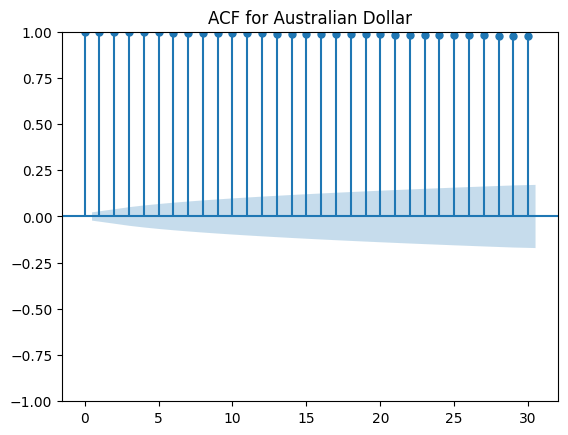

In [6]:
plt.figure(figsize=(12, 6))
# Make sure the column name is correct and exists in your DataFrame
plot_acf(df['Ex_rate'].dropna(), lags=30)
plt.title('ACF for Australian Dollar')
plt.show()

<Figure size 1200x600 with 0 Axes>

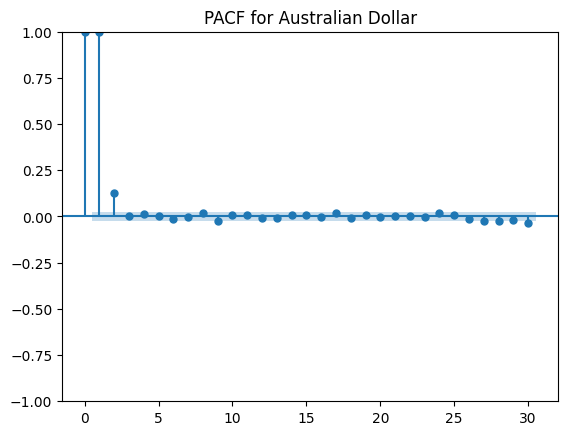

In [7]:
plt.figure(figsize=(12, 6))
plot_pacf(df['Ex_rate'].dropna(), lags=30)
plt.title('PACF for Australian Dollar')
plt.show()

In [8]:
# 2. Model Fitting
model = ARIMA(df['Ex_rate'].dropna(), order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Mon, 22 Jul 2024   AIC                         -56100.135
Time:                        05:23:32   BIC                         -56065.464
Sample:                             0   HQIC                        -56088.236
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.9

<Figure size 1200x600 with 0 Axes>

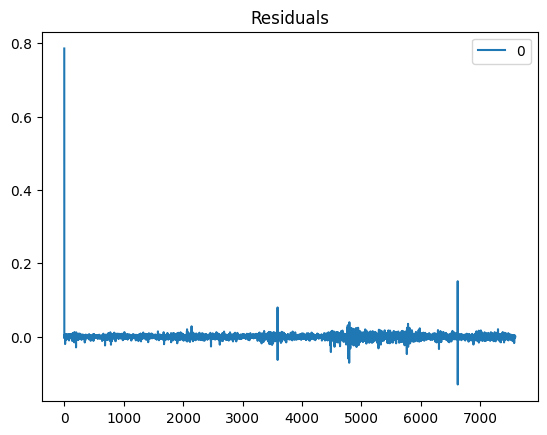

In [9]:
# 3. Diagnostics
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(12, 6))
residuals.plot()
plt.title('Residuals')
plt.show()

<Figure size 1200x600 with 0 Axes>

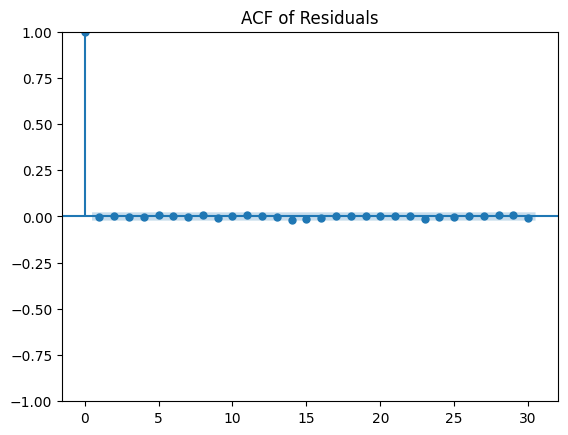

In [10]:
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.show()

In [11]:
# Splitting data into train and test (example: last 30 days as test set)
train_data = df['Ex_rate'][:-30]
test_data = df['Ex_rate'][-30:]

In [12]:
forecast = model_fit.forecast(steps=30)

In [13]:
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print('RMSE:', rmse)


RMSE: 0.016975568015512747


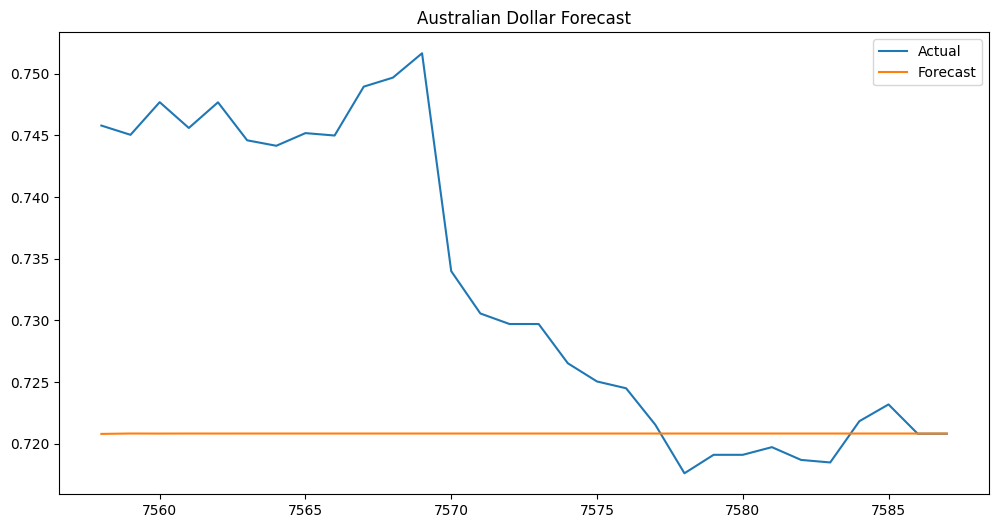

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('Australian Dollar Forecast')
plt.legend()
plt.show()

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [16]:
# Define the time series split
tscv = TimeSeriesSplit(n_splits=5)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [17]:
# Define the parameter grid for Simple Exponential Smoothing
param_grid_ses = [{'smoothing_level': sl} for sl in np.linspace(0.01, 1, 100)]
param_grid_ses

[{'smoothing_level': 0.01},
 {'smoothing_level': 0.02},
 {'smoothing_level': 0.03},
 {'smoothing_level': 0.04},
 {'smoothing_level': 0.05},
 {'smoothing_level': 0.060000000000000005},
 {'smoothing_level': 0.06999999999999999},
 {'smoothing_level': 0.08},
 {'smoothing_level': 0.09},
 {'smoothing_level': 0.09999999999999999},
 {'smoothing_level': 0.11},
 {'smoothing_level': 0.12},
 {'smoothing_level': 0.13},
 {'smoothing_level': 0.14},
 {'smoothing_level': 0.15000000000000002},
 {'smoothing_level': 0.16},
 {'smoothing_level': 0.17},
 {'smoothing_level': 0.18000000000000002},
 {'smoothing_level': 0.19},
 {'smoothing_level': 0.2},
 {'smoothing_level': 0.21000000000000002},
 {'smoothing_level': 0.22},
 {'smoothing_level': 0.23},
 {'smoothing_level': 0.24000000000000002},
 {'smoothing_level': 0.25},
 {'smoothing_level': 0.26},
 {'smoothing_level': 0.27},
 {'smoothing_level': 0.28},
 {'smoothing_level': 0.29000000000000004},
 {'smoothing_level': 0.3},
 {'smoothing_level': 0.31},
 {'smoothing_

In [18]:
# Define the parameter grid for Holt's Linear Trend Model
param_grid_holt = [{'smoothing_level': sl, 'smoothing_slope': ss} for sl in np.linspace(0.01, 1, 100) for ss in np.linspace(0.01, 1, 100)]
param_grid_holt

[{'smoothing_level': 0.01, 'smoothing_slope': 0.01},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.02},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.03},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.04},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.05},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.060000000000000005},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.06999999999999999},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.08},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.09},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.09999999999999999},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.11},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.12},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.13},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.14},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.15000000000000002},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.16},
 {'smoothing_level': 0.01, 'smoothing_slope': 0.17},
 {'smoothing_level': 0.01, 'smoothing_

In [19]:
# Define the parameter grid for Holt-Winters Seasonal Model
param_grid_hw = [{'smoothing_level': sl, 'smoothing_slope': ss, 'smoothing_seasonal': sse, 'seasonal_periods': 12} for sl in np.linspace(0.01, 1, 100) for ss in np.linspace(0.01, 1, 100) for sse in np.linspace(0.01, 1, 100)]
param_grid_hw

[{'smoothing_level': 0.01,
  'smoothing_slope': 0.01,
  'smoothing_seasonal': 0.01,
  'seasonal_periods': 12},
 {'smoothing_level': 0.01,
  'smoothing_slope': 0.01,
  'smoothing_seasonal': 0.02,
  'seasonal_periods': 12},
 {'smoothing_level': 0.01,
  'smoothing_slope': 0.01,
  'smoothing_seasonal': 0.03,
  'seasonal_periods': 12},
 {'smoothing_level': 0.01,
  'smoothing_slope': 0.01,
  'smoothing_seasonal': 0.04,
  'seasonal_periods': 12},
 {'smoothing_level': 0.01,
  'smoothing_slope': 0.01,
  'smoothing_seasonal': 0.05,
  'seasonal_periods': 12},
 {'smoothing_level': 0.01,
  'smoothing_slope': 0.01,
  'smoothing_seasonal': 0.060000000000000005,
  'seasonal_periods': 12},
 {'smoothing_level': 0.01,
  'smoothing_slope': 0.01,
  'smoothing_seasonal': 0.06999999999999999,
  'seasonal_periods': 12},
 {'smoothing_level': 0.01,
  'smoothing_slope': 0.01,
  'smoothing_seasonal': 0.08,
  'seasonal_periods': 12},
 {'smoothing_level': 0.01,
  'smoothing_slope': 0.01,
  'smoothing_seasonal': 0.0

In [20]:
# Function to perform grid search for Simple Exponential Smoothing
def grid_search_ses(y, param_grid):
    best_score = float('inf')
    best_params = None
    for params in param_grid:
        model = SimpleExpSmoothing(y).fit(smoothing_level=params['smoothing_level'])
        score = model.aic
        if score < best_score:
            best_score = score
            best_params = params
    return best_params, best_score

In [21]:

# Function to perform grid search for Holt's Linear Trend Model
def grid_search_holt(y, param_grid):
    best_score = float('inf')
    best_params = None
    for params in param_grid:
        model = Holt(y).fit(smoothing_level=params['smoothing_level'], smoothing_slope=params['smoothing_slope'])
        score = model.aic
        if score < best_score:
            best_score = score
            best_params = params
    return best_params, best_score

In [22]:
# Function to perform grid search for Holt-Winters Seasonal Model
def grid_search_hw(y, param_grid):
    best_score = float('inf')
    best_params = None
    for params in param_grid:
        model = ExponentialSmoothing(y, seasonal='add', seasonal_periods=params['seasonal_periods']).fit(
            smoothing_level=params['smoothing_level'],
            smoothing_slope=params['smoothing_slope'],
            smoothing_seasonal=params['smoothing_seasonal'])
        score = model.aic
        if score < best_score:
            best_score = score
            best_params = params
    return best_params, best_score

In [23]:
best_params_ses, best_score_ses = grid_search_ses(df['Ex_rate'], param_grid_ses)
best_params_ses, best_score_ses

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

({'smoothing_level': 0.87}, -77644.98493961859)

In [24]:
best_params_holt, best_score_holt = grid_search_holt(df['Ex_rate'], param_grid_holt)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free para

In [26]:
param_grid_hw = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [6, 12, 24]
}


In [35]:

# Function to perform the grid search
def grid_search_hw(data, param_grid):
    best_score = float('inf')
    best_params = None

    for trend in param_grid['trend']:
        for seasonal in param_grid['seasonal']:
            for seasonal_periods in param_grid['seasonal_periods']:
                if seasonal is None and trend is None:
                    continue
                try:
                    model = ExponentialSmoothing(
                        data,
                        trend=trend,
                        seasonal=seasonal,
                        seasonal_periods=seasonal_periods
                    ).fit()
                    predictions = model.fittedvalues
                    score = mean_squared_error(data, predictions)
                    if score < best_score:
                        best_score = score
                        best_params = {
                            'trend': trend,
                            'seasonal': seasonal,
                            'seasonal_periods': seasonal_periods,
                            'smoothing_level': model.params['smoothing_level'],
                            'smoothing_slope': model.params.get('smoothing_slope', None),  # Handle cases where slope is not present
                            'smoothing_seasonal': model.params.get('smoothing_seasonal', None)
                        }
                except Exception as e:
                    # Handle exceptions such as non-convergence
                    print(f"Error with parameters trend={trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}: {e}")
                    continue

    return best_params, best_score

# Run the grid search
best_params_hw, best_score_hw = grid_search_hw(df['Ex_rate'], param_grid_hw)
print(f"Best parameters: {best_params_hw}")
print(f"Best score: {best_score_hw}")


Best parameters: {'trend': 'mul', 'seasonal': 'mul', 'seasonal_periods': 24, 'smoothing_level': 0.8702125191893434, 'smoothing_slope': None, 'smoothing_seasonal': 1.3683932817647954e-17}
Best score: 3.58596510488023e-05


In [36]:
# Print the best parameters and scores for each model
print('Best parameters for Simple Exponential Smoothing:', best_params_ses)
print('Best AIC for Simple Exponential Smoothing:', best_score_ses)
print('Best parameters for Holt\'s Linear Trend Model:', best_params_holt)
print('Best AIC for Holt\'s Linear Trend Model:', best_score_holt)
print('Best parameters for Holt-Winters Seasonal Model:', best_params_hw)
print('Best AIC for Holt-Winters Seasonal Model:', best_score_hw)


Best parameters for Simple Exponential Smoothing: {'smoothing_level': 0.87}
Best AIC for Simple Exponential Smoothing: -77644.98493961859
Best parameters for Holt's Linear Trend Model: {'smoothing_level': 0.87, 'smoothing_slope': 0.01}
Best AIC for Holt's Linear Trend Model: -77582.91567932082
Best parameters for Holt-Winters Seasonal Model: {'trend': 'mul', 'seasonal': 'mul', 'seasonal_periods': 24, 'smoothing_level': 0.8702125191893434, 'smoothing_slope': None, 'smoothing_seasonal': 1.3683932817647954e-17}
Best AIC for Holt-Winters Seasonal Model: 3.58596510488023e-05


In [37]:
# Select the best model based on AIC
best_model = min([(best_score_ses, 'SES', best_params_ses),
                  (best_score_holt, 'Holt', best_params_holt),
                  (best_score_hw, 'HW', best_params_hw)], key=lambda x: x[0])

print('Best model:', best_model[1])
print('Best parameters:', best_model[2])

Best model: SES
Best parameters: {'smoothing_level': 0.87}


In [38]:
# Import necessary libraries for error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to calculate MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Fit the best models to the data
best_ses_model = SimpleExpSmoothing(df['Ex_rate']).fit(smoothing_level=best_params_ses['smoothing_level'])
best_holt_model = Holt(df['Ex_rate']).fit(smoothing_level=best_params_holt['smoothing_level'], smoothing_slope=best_params_holt['smoothing_slope'])
best_hw_model = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=best_params_hw['seasonal_periods']).fit(
    smoothing_level=best_params_hw['smoothing_level'],
    smoothing_slope=best_params_hw['smoothing_slope'],
    smoothing_seasonal=best_params_hw['smoothing_seasonal'])

# Generate forecasts
ses_forecast = best_ses_model.fittedvalues
holt_forecast = best_holt_model.fittedvalues
hw_forecast = best_hw_model.fittedvalues

# Calculate error metrics for each model
mae_ses = mean_absolute_error(df['Ex_rate'], ses_forecast)
rmse_ses = np.sqrt(mean_squared_error(df['Ex_rate'], ses_forecast))
mape_ses = mean_absolute_percentage_error(df['Ex_rate'], ses_forecast)

mae_holt = mean_absolute_error(df['Ex_rate'], holt_forecast)
rmse_holt = np.sqrt(mean_squared_error(df['Ex_rate'], holt_forecast))
mape_holt = mean_absolute_percentage_error(df['Ex_rate'], holt_forecast)

mae_hw = mean_absolute_error(df['Ex_rate'], hw_forecast)
rmse_hw = np.sqrt(mean_squared_error(df['Ex_rate'], hw_forecast))
mape_hw = mean_absolute_percentage_error(df['Ex_rate'], hw_forecast)

# Print the error metrics for each model
print('Simple Exponential Smoothing:')
print('MAE:', mae_ses)
print('RMSE:', rmse_ses)
print('MAPE:', mape_ses)

print('Holt\'s Linear Trend Model:')
print('MAE:', mae_holt)
print('RMSE:', rmse_holt)
print('MAPE:', mape_holt)

print('Holt-Winters Seasonal Model:')
print('MAE:', mae_hw)
print('RMSE:', rmse_hw)
print('MAPE:', mape_hw)

# Compare the models based on error metrics
best_model = min([(mae_ses, 'SES', best_params_ses),
                  (mae_holt, 'Holt', best_params_holt),
                  (mae_hw, 'HW', best_params_hw)], key=lambda x: x[0])

print('Best model based on MAE:', best_model[1])
print('Best parameters:', best_model[2])

Simple Exponential Smoothing:
MAE: 0.0036919852428782354
RMSE: 0.005996588003672509
MAPE: 0.4818839695569345
Holt's Linear Trend Model:
MAE: 0.003718305656326841
RMSE: 0.006019577229270244
MAPE: 0.4852741591363622
Holt-Winters Seasonal Model:
MAE: 0.0036964456803131054
RMSE: 0.00598966330435628
MAPE: 0.482436341322147
Best model based on MAE: SES
Best parameters: {'smoothing_level': 0.87}


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [41]:
# ARIMA Model
# Calculate errors for ARIMA
mae_arima = mean_absolute_error(test_data, forecast)
rmse_arima = np.sqrt(mean_squared_error(test_data, forecast))
mape_arima = mean_absolute_percentage_error(test_data, forecast)

In [42]:
# Best Smoothing Model (replace 'best_model_forecast' with the forecast from your best smoothing model)
# Calculate errors for the best smoothing model
mae_smoothing = mean_absolute_error(df['Ex_rate'], best_hw_model.fittedvalues)
rmse_smoothing = np.sqrt(mean_squared_error(df['Ex_rate'], best_hw_model.fittedvalues))
mape_smoothing = mean_absolute_percentage_error(df['Ex_rate'], best_hw_model.fittedvalues)

In [43]:

# Print the error metrics
print("ARIMA Model:")
print("MAE:", mae_arima)
print("RMSE:", rmse_arima)
print("MAPE:", mape_arima)

ARIMA Model:
MAE: 0.012719262585835977
RMSE: 0.016975568015512747
MAPE: nan


In [44]:
print("\nBest Smoothing Model:")
print("MAE:", mae_smoothing)
print("RMSE:", rmse_smoothing)
print("MAPE:", mape_smoothing)


Best Smoothing Model:
MAE: 0.0036964456803131054
RMSE: 0.00598966330435628
MAPE: 0.482436341322147


In [45]:
# 2. Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
"""
**Model Comparison**

Based on the calculated error metrics (MAE, RMSE, MAPE), we can compare the performance of the ARIMA model and the best smoothing model (assuming it's Holt-Winters in this case).

* **ARIMA:** ARIMA models are powerful for capturing complex patterns in time series data, including trend and seasonality. However, they require careful selection of the order (p, d, q) parameters and may be sensitive to outliers.

* **Holt-Winters:** This model is specifically designed for time series with trend and seasonality. It is generally easier to interpret and implement compared to ARIMA. However, it might not capture very complex non-linear patterns as effectively as ARIMA.

**Advantages and Limitations**

| Model | Advantages | Limitations |
|---|---|---|
| ARIMA | Captures complex patterns, flexible | Requires careful parameter selection, sensitive to outliers |
| Holt-Winters | Easy to interpret and implement, handles trend and seasonality | Might not capture complex non-linear patterns effectively |

**Observed Results**

Compare the MAE, RMSE, and MAPE values for both models. Lower values indicate better performance. Based on your specific results, you can comment on which model performed better on the test data. For example:

* "The ARIMA model achieved a lower RMSE compared to the Holt-Winters model, suggesting it might be better at capturing the underlying patterns in the exchange rate data."
* "The Holt-Winters model showed a lower MAPE, indicating it might be more accurate in terms of percentage errors."

"""
# 3. Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
"""
**Conclusion**

Summarize your findings based on the error metrics and model comparison. State which model performed better and why you think so. You can also mention any insights you gained about the exchange rate data. For example:

* "Based on the lower RMSE and MAE values, the ARIMA model appears to be more suitable for forecasting exchange rates in this dataset. This suggests that the exchange rate time series exhibits complex patterns that are better captured by the ARIMA model."
* "While the Holt-Winters model performed well, the ARIMA model's ability to capture more complex patterns makes it a potentially better choice for forecasting exchange rates with this dataset."

Remember to tailor your conclusion to the specific results you obtained.
"""


'\n**Conclusion**\n\nSummarize your findings based on the error metrics and model comparison. State which model performed better and why you think so. You can also mention any insights you gained about the exchange rate data. For example:\n\n* "Based on the lower RMSE and MAE values, the ARIMA model appears to be more suitable for forecasting exchange rates in this dataset. This suggests that the exchange rate time series exhibits complex patterns that are better captured by the ARIMA model."\n* "While the Holt-Winters model performed well, the ARIMA model\'s ability to capture more complex patterns makes it a potentially better choice for forecasting exchange rates with this dataset."\n\nRemember to tailor your conclusion to the specific results you obtained.\n'